# Getting Started with Panel

## Source: https://panel.holoviz.org/getting_started/build_app.html

In [1]:

# Example Dataset -> measuring the environment in a meeting room
# Panel can be used for dashboards as well as interactive apps.

import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt

csv_file = 'https://raw.githubusercontent.com/holoviz/panel/main/examples/assets/occupancy.csv'
data = pd.read_csv(csv_file, parse_dates=['date'], index_col='date')

data.tail()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


Smoothes the time series and identifies outliers

In [12]:
import matplotlib as mpl
mpl.use('agg')

from matplotlib.figure import Figure

def mpl_plot(avg, highlight):
    fig = Figure()
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

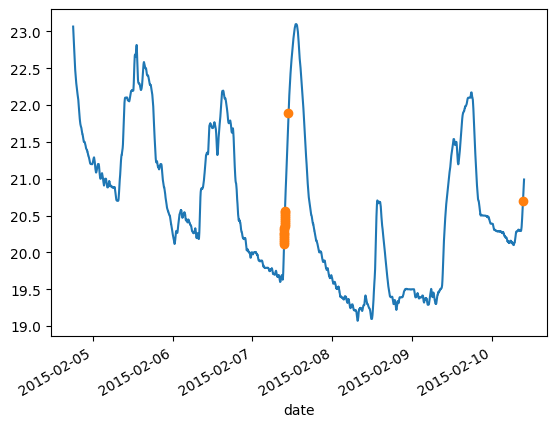

In [15]:
%matplotlib inline
find_outliers(variable='Temperature', window=20, sigma=10)

Now we will add some interactivity. To do this, we use panel, and link some slider widgets to our function arguments.

In [16]:
import panel as pn
pn.extension()

window = pn.widgets.IntSlider(name='window', value=30, start=1, end=60)
sigma = pn.widgets.IntSlider(name='sigma', value=10, start=0, end=20)

interactive = pn.bind(find_outliers, window=window, sigma=sigma)

Column
    [0] IntSlider(end=60, name='window', start=1, value=30)
    [1] IntSlider(end=20, name='sigma', value=10)
    [2] ParamFunction(function, _pane=Matplotlib)
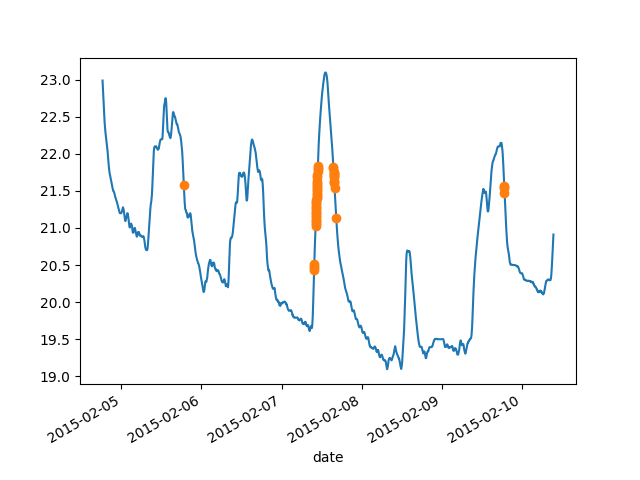

In [17]:
first_app = pn.Column(window, sigma, interactive)

first_app

Some graphics libraries you can use here: matplotplib, bokeh, plotly, altair.

In [19]:
first_app.show()

Launching server at http://localhost:55616


Or, you can simply mark whatever you want to be in the separate web page with .servable(), and then run the shell command panel serve --show Create_App.ipynb to launch a server containing that object. (Here, we’ve also added a semicolon to avoid getting another copy of the occupancy app here in the notebook.)

Column
    [0] IntSlider(end=60, name='window', start=1, value=29)
    [1] IntSlider(end=20, name='sigma', value=6)
    [2] ParamFunction(function, _pane=Matplotlib)
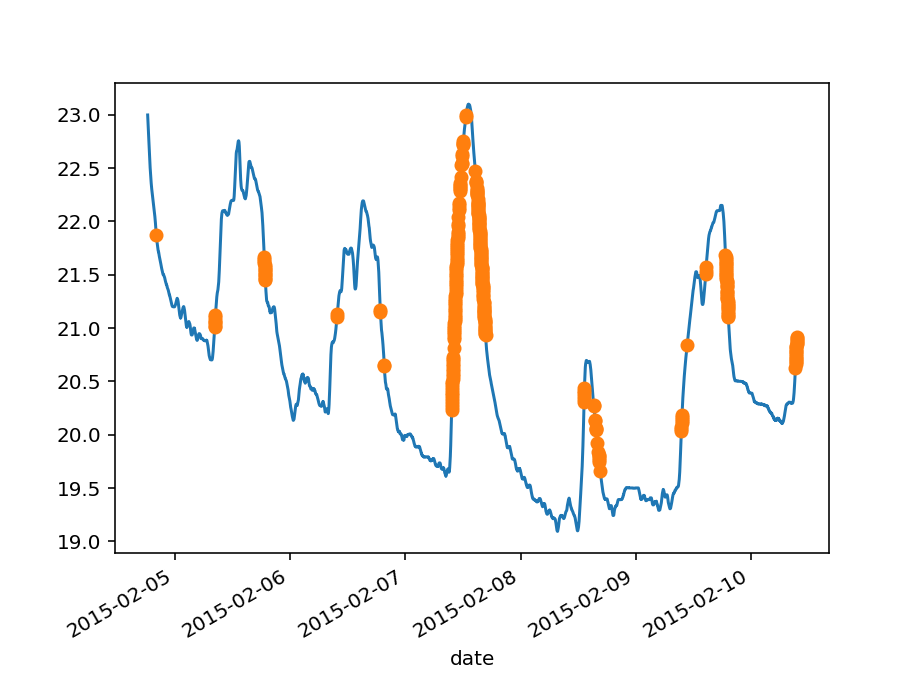

In [21]:
first_app.servable()